## **Abstract**

In this study, we look to implement disentangled representations in generative models, on real-world data to see how it influences feature compressions and feature control to manipulate final generated output.

Powerful generative models can be used to generate synthetic data with complex covariance. Disentangled representations in generative models mean that a change in a latent unit will result in a change in the generative factor and vice versa while other generative factors or latent units remain insensitive

New intuitions and theoretical assessments of the emergence of disentangled representation in variational autoencoders are presented. Here, we show the circumstances under which representations aligned with
the underlying generative factors of variation of data emerge when optimising the modified ELBO bound in β-VAE, as training progresses. From these insights,
we propose a modification to the training regime of β-VAE, that progressively
increases the information capacity of the latent code during training. This modification facilitates the robust learning of disentangled representations in β-VAE,
without the previous trade-off in reconstruction accuracy.

## **β-VAE**

E
β-VAE is a modification of the variational autoencoder (VAE) framework that introduces an
adjustable hyperparameter β to the original VAE objective:

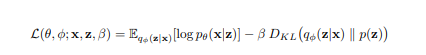


Well chosen values of β (usually β > 1) result in more disentangled latent representations z. When
β = 1, the β-VAE becomes equivalent to the original VAE framework. It was suggested that the
stronger pressure for the posterior qφ(z|x) to match the factorised unit Gaussian prior p(z) introduced
by the β-VAE objective puts extra constraints on the implicit capacity of the latent bottleneck z and
extra pressures for it to be factorised while still being sufficient to reconstruct the data x. Higher
values of β necessary to encourage disentangling often lead to a trade-off between the fidelity of
β-VAE reconstructions and the disentangled nature of its latent code z. This due
to the loss of information as it passes through the restricted capacity latent bottleneck z

## **Understanding disentangling in β-VAE**

### **Information Bottleneck**


The β-VAE objective is closely related to the information bottleneck principle:

***max[I(Z; Y ) − βI(X;Z)***


where I(·; ·) stands for mutual information and β is a Lagrange multiplier. The information bottleneck
describes a constrained optimisation objective where the goal is to maximise the mutual information
between the latent bottleneck Z and the task Y while discarding all the irrelevant information about
Y that might be present in the input X. In the information bottleneck literature, Y would typically
stand for a classification task, however the formulation can be related to the auto-encoding objective
too


Reconstructing under this bottleneck encourages embedding the data points on a set of representational
axes where nearby points on the axes are also close in data space. To see this, following the above,
note that the KL can be minimised by reducing the spread of the posterior means, or broadening the
posterior variances, i.e. by squeezing the posterior distributions into a shared coding space. Intuitively,
we can think about this in terms of the degree of overlap between the posterior distributions across
the dataset . The more they overlap, the broader the posterior distributions will be on average
(relative to the coding space), and the smaller the KL divergence can be. However, a greater degree
of overlap between posterior distributions will tend to result in a cost in terms of log likelihood due
to their reduced average discriminability. A sample drawn from the posterior given one data point
may have a higher probability under the posterior of a different data point, an increasingly frequent

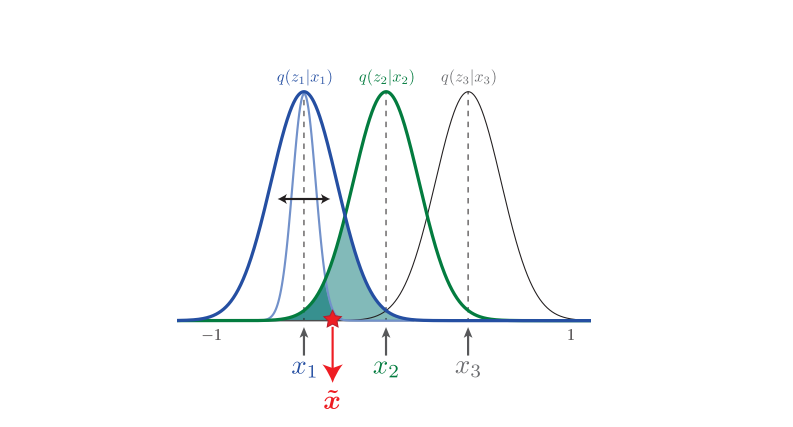

Connecting posterior overlap with minimizing the KL divergence and reconstruction
error. Broadening the posterior distributions and/or bringing their means closer together will tend
to reduce the KL divergence with the prior, which both increase the overlap between them. But, a
datapoint x˜ sampled from the distribution q(z2|x2) is more likely to be confused with a sample from
q(z1|x1) as the overlap between them increases. Hence, ensuring neighbouring points in data space
are also represented close together in latent space will tend to reduce the log likelihood cost of this
confusion.
occurrence as overlap between the distributions is increased. For example, in Figure 1, the sample
indicated by the red star might be drawn from the (green) posterior q(z2|x2), even though it would
occur more frequently under the overlapping (blue) posterior q(z1|x1), and so (assuming x1 and x2
were equally probable), an optimal decoder would assign a higher log likelihood to x1 for that sample.
Nonetheless, under a constraint of maximising such overlap, the smallest cost in the log likelihood
can be achieved by arranging nearby points in data space close together in the latent space. By doing
so, when samples from a given posterior q(z2|x2) are more likely under another data point such as
x1, the log likelihood Eq(z2|x2)
[log p(x2|z2)] cost will be smaller if x1 is close to x2 in data space.


### **Beta Variational Autoencoder (simple dots)**

In this notebook, we will use a beta variational autoencoder (-VAE) to encode/decode a simple dataset consisting of a single white dot on a black background. The  term is varied to explore it's impact on reconstruction and latent representation. For these experiments we'll be using a simple dots dataset that consists of images of a white dot on a black blackground. This dataset has two ground truth generative factors, the x and y coordinate of the dot. Therefore, if the latent representation utilizes more than two dimensions, it isn't parsimonious and may not be disentangled. Likewise if the latent representation only utilizes one latent dimension it isn't disentangled.

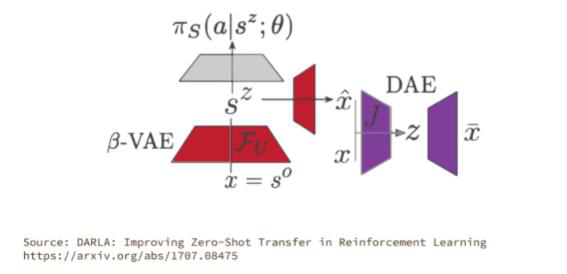

# **β - VAE**

This is an implementation of β-variational auto-encoders (β-VAE), the state-of-the-art model for unsupervised visual disentangled representation learning. This work replicating DeepMind's papers "[β-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework](https://openreview.net/forum?id=Sy2fzU9gl)" and "[Understanding disentangling in β-VAE](https://arxiv.org/abs/1804.03599)".

## **What is disentanglement?**

A disentangled representation can be defined as one where single latent units are sensitive to changes in single generative factors, while being relatively invariant to changes in other factors. Here a feature representation can be thought of as a coordinate system with each latent unit being one of its many axes. There are many ways to extract independent feature representations (PCA and ICA decompositions), however independence does not guarantee disentanglement. Take for instance a 2D coordinate system with generative factors as i and j vectors. While 3i/5 + 4j/5 and i/2 + sq.root(3) j/2 form independent factors in 2D space, they are not disentangled, i.e., change of one latent factor will affect multiple generative factors.

## **Why do we need disentanglement**

* Good interpretability
* Aids an RL agent to achieve better transfer performance outside of the training data distribution
* A step towards the generality and robustness of biological intelligence

In [22]:
!pip install sconce
!pip install pytorch-sconce

     |████████████████████████████████| 2.7 MB 5.1 MB/s 
  Created wheel for pytorch-sconce: filename=pytorch_sconce-1.4.0-py3-none-any.whl size=61718 sha256=5e07dee4838a0d6e60f7910d176dd876b7eaef01034a6331a54ce9c1e622dd15
  Stored in directory: /root/.cache/pip/wheels/cf/cd/d0/e513eed651ee1c9b486f9dbafea6d407c87476623113096eef
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3587 sha256=24e650994233cd8cd071a3fce4d85e8da5203a8f1de1cd99c4be70cce5534ce1
  Stored in directory: /root/.cache/pip/wheels/86/ab/a3/a8fa7e0a07e80f547e03468c03827f8257f7339327986faed1
Successfully built pytorch-sconce stringcase


In [23]:
import sconce
print(f"This notebook was run using sconce {sconce.__version__}")

This notebook was run using sconce 1.4.0


## **Define plot_traversal function**

We'll make extensive use of this function to explore the latent representations encoded by our -VAEs. This function takes and encodes a single input image, and then shows how varying each latent variable affects the reconstruction

## **Plot Traversals of Latent Space**

A latent traversal is a simple idea. Basically, you start with a randomly selected data sample and feed it through your VAE’s encoder, getting out the latent representation of the data sample, lets call it z. This z will be a vector of size N. If we adjust one value, keeping the other N-1 values fixed, we can produce a bunch of latent variations. Finally, we take those latent variations and decode them. We can then repeat this for all of the latent dimensions.


1. Encode an input to a latent representation
2. Adjust each latent value from -3 to 3 while keeping other values to fixed
3. Decode each adjusted latent representation
4. Display

In [24]:
from matplotlib import pyplot as plt
import numpy as np

def plot_traversal(trainer, index=0, figure_width=10.5, num_cols=9, image_height=1.5):
    """
    Plot a traversal of the latent space.
    
    Steps are:
        1) encode an input to a latent representation
        2) adjust each latent value from -3 to 3 while keeping other values fixed
        3) decode each adjusted latent representation
        4) display
    """
    sample, target = trainer.validation_feed.dataset[index]
    sample_batch = sample[None].cuda()
    trainer.model.train(False)
    mu, logvar = trainer.model.encode(sample_batch)
    z = mu  # since we're not training, no noise is added
    
    num_rows = z.shape[-1]
    num_cols = num_cols
    
    fig = plt.figure(figsize=(figure_width, image_height * num_rows))
    
    for i in range(num_rows):
        z_i_values = np.linspace(-3.0, 3.0, num_cols)
        z_i = z[0][i].detach().cpu().numpy()
        z_diffs = np.abs((z_i_values - z_i))
        j_min = np.argmin(z_diffs)
        for j in range(num_cols):
            z_i_value = z_i_values[j]
            if j != j_min:
                z[0][i] = z_i_value
            else:
                z[0][i] = float(z_i)
                
            x = trainer.model.decode(z).detach().cpu().numpy()
            
            ax = fig.add_subplot(num_rows, num_cols, i * num_cols + j + 1)
            ax.imshow(x[0][0], cmap='gray')
            
            if i == 0 or j == j_min:
                ax.set_title(f'{z[0][i]:.1f}')
            
            if j == j_min:
                ax.set_xticks([], [])
                ax.set_yticks([], []) 
                color = 'mediumseagreen'
                width = 8
                for side in ['top', 'bottom', 'left', 'right']:
                    ax.spines[side].set_color(color)
                    ax.spines[side].set_linewidth(width)
            else:
                ax.axis('off')
        z[0][i] = float(z_i)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace=0.04)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import mnist


In [26]:
from sconce.data_feeds import ImageFeed
from sconce.datasets import SimpleDots

dataset = SimpleDots(image_size=(62, 62), circle_radius=8, num_images=3_000)
training_feed = ImageFeed.from_dataset(dataset, batch_size=200, num_workers=7, shuffle=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [27]:
import torch
from torch import optim
from sconce.trainers import AutoencoderTrainer
from sconce.models import VariationalAutoencoder

def get_trainer(conv_channels=[32, 32, 32, 32], hidden_sizes=[256, 256], latent_size=5):
    model = VariationalAutoencoder(conv_channels=conv_channels,
                                   hidden_sizes=hidden_sizes,
                                   image_channels=1,
                                   image_size = dataset.image_size,
                                   latent_size=latent_size)
    
    if torch.cuda.is_available():
        model.cuda()
        training_feed.cuda()
        
    model.set_optimizer(optim.Adam, lr=1e-1)

    trainer = AutoencoderTrainer(model=model,
        training_feed=training_feed,
        validation_feed=training_feed)
    trainer.validation_to_train_ratio = 0
    return trainer

## **Results (Low Beta Value)**

This set of hyperparameters is quite reliable in getting a latent representation that uses 3+ of the latent dimensions.

 13/149 [=>............................] - ETA: 7s - loss: 1.1582

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


100/149 [===================>..........] - ETA: 2s - loss: 1.2934
Scheduled training termination: Exponential Schedule stop condition met.


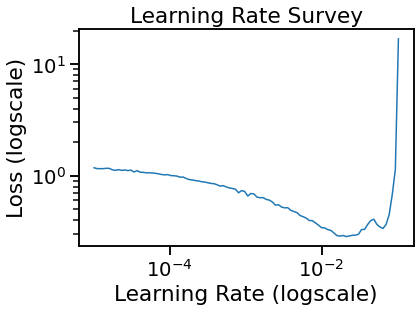

In [28]:
trainer = get_trainer()
monitor = trainer.survey_learning_rate(num_epochs=10, min_learning_rate=1e-5, max_learning_rate=10)
monitor.dataframe_monitor.plot_learning_rate_survey()

   3/2970 [..............................] - ETA: 1:09 - loss: 0.8807

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2970/2970 [==============================] - 177s 60ms/step - loss: 0.0320


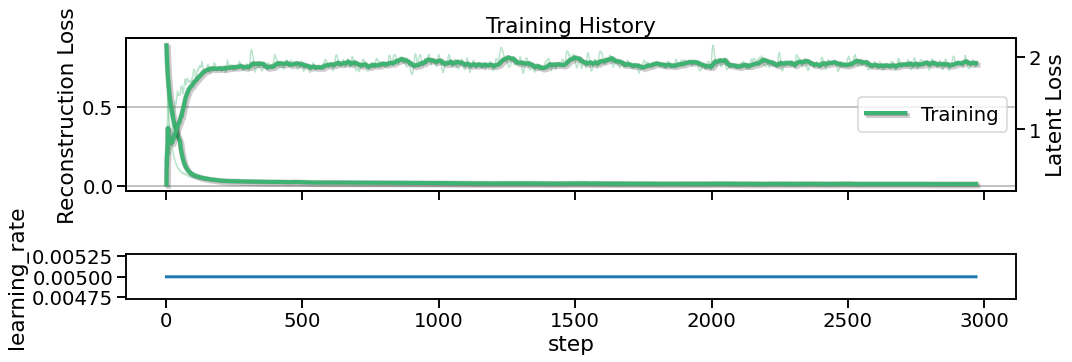

In [29]:
trainer = get_trainer()
trainer.model.set_schedule('learning_rate', 5e-3)
trainer.model.set_schedule('beta', 0.01)
monitor = trainer.train(num_epochs=200)
monitor.dataframe_monitor.plot(skip_first=0, metrics=['reconstruction_loss', 'latent_loss']);

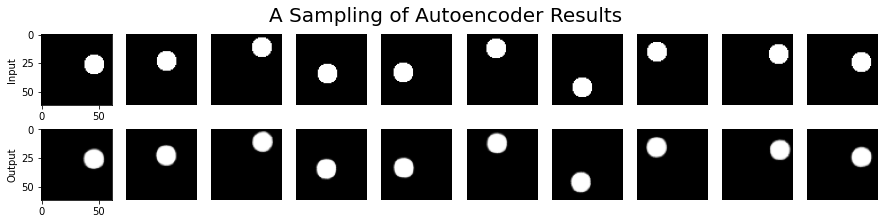

In [ ]:
trainer.plot_input_output_pairs();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


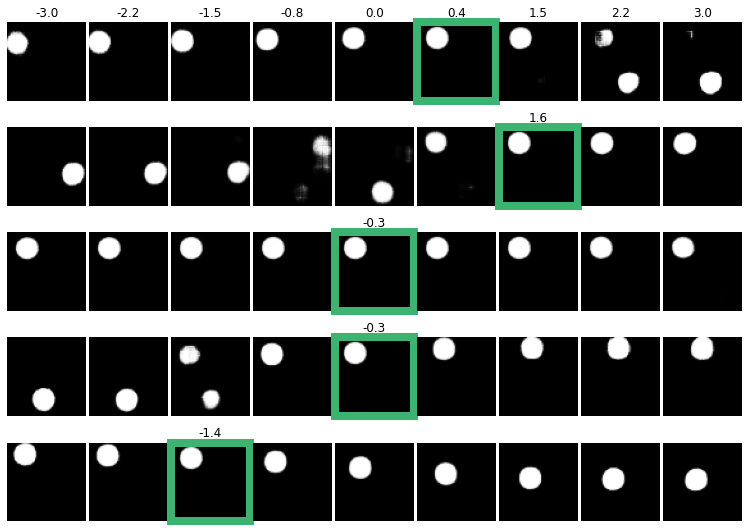

In [ ]:
plot_traversal(trainer, index=500)

When the information bottleneck is too wide, the network spreads the latent representation out across four different dimensions. Recall that there are only two ground truth generative factors, so two latent dimensions would suffice. What’s more, when you adjust one latent dimension, the outputs aren’t always valid reconstructions, some of them even show two dots.

## **Results (High Beta Value)**

This set of training hyperparameters gets you either fully confused reconstructions (big white squares) or a latent representation that only uses one of the five latent dimensions. It seems about equally likely (based on random initialization) to do one of those two things.

   5/5940 [..............................] - ETA: 7:46 - loss: 0.9971

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


5940/5940 [==============================] - 627s 106ms/step - loss: 0.2117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


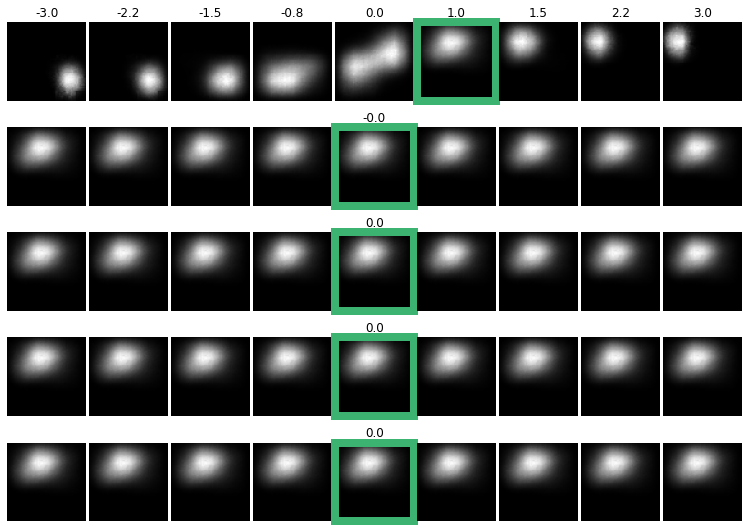

In [ ]:
high_beta_trainer = get_trainer()
high_beta_trainer.model.set_schedule('learning_rate', 5e-3)
high_beta_trainer.model.set_schedule('beta', 0.25)
high_beta_trainer.train(num_epochs=400)
plot_traversal(high_beta_trainer, index=950)

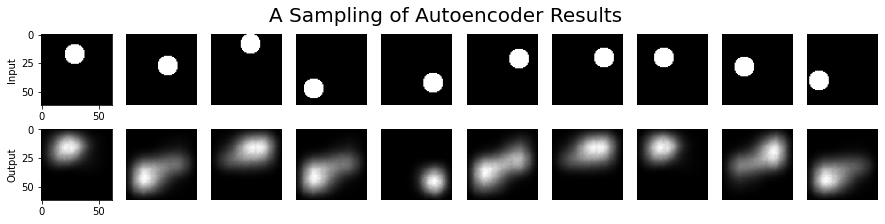

In [ ]:
high_beta_trainer.plot_input_output_pairs();

We chose too high a value for β and now the information bottleneck is too restricted. The network isn’t even able to make reasonably good reconstructions under these conditions. Ok, lets try again and see if there is a “sweet spot” or critical value for β, where we get a nice disentangled latent representation.|

## **Results (Critical Beta Value)**

This set of training hyperparameters seems like it gets the desired disentangled latent representation about 1 in 3 runs.

In [ ]:
critical_beta_trainer = get_trainer()
critical_beta_trainer.model.set_schedule('learning_rate', 5e-3)
critical_beta_trainer.model.set_schedule('beta', 0.125)
critical_beta_trainer.train(num_epochs=400)

   4/5940 [..............................] - ETA: 7:45 - loss: 0.8262

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


5940/5940 [==============================] - 687s 116ms/step - loss: 0.1451


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


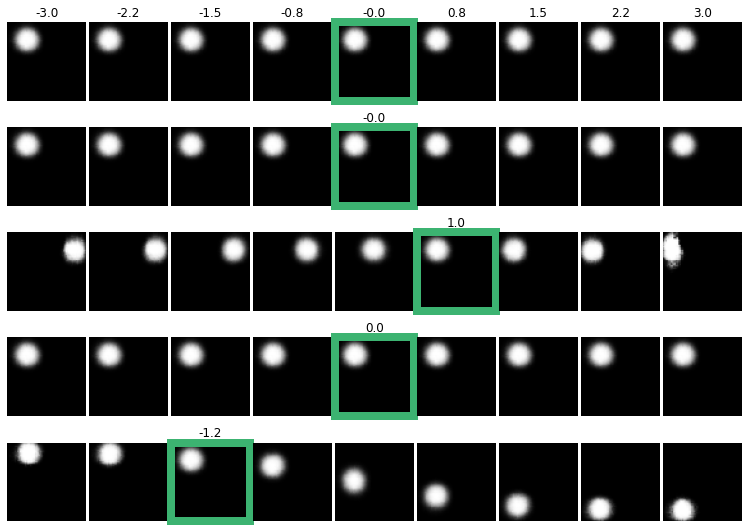

In [ ]:
plot_traversal(critical_beta_trainer, index=500)

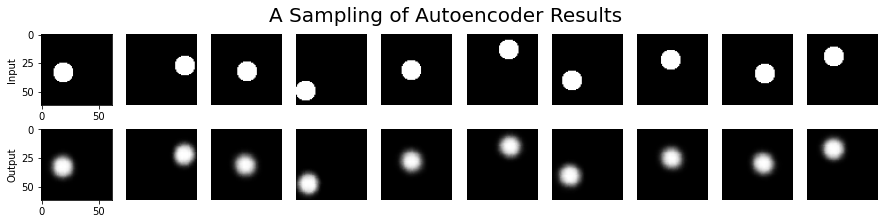

In [ ]:
critical_beta_trainer.plot_input_output_pairs();

Now we have a latent space where only two of the five available dimensions actually encode for anything, and what’s more, they are orthogonal. We appear to have suffered some with regards to the reconstruction quality (relative to the low β value), but maybe we can maybe fix that. The paper goes on to mention a technique to increase the reconstruction quality without losing the disentangling.

## **Adjusting Beta During Training**

These hyperparameters are also pretty reliable at getting a good disentangled latent representation and good reconstruction quality. About one in five runs this will have a latent representation that either tries to use only one latent dimension, uses three.

In [ ]:
from sconce.schedules import Cosine

adjusting_trainer = get_trainer()
adjusting_trainer.model.set_schedule('learning_rate', 5e-3)
adjusting_trainer.model.set_schedule('beta', Cosine(initial_value=0.001, final_value=0.3))
adjusting_trainer.train(num_epochs=200)

adjusting_trainer.model.set_schedule('beta', Cosine(initial_value=0.3, final_value=0.001))
adjusting_trainer.train(num_epochs=600)

   3/2970 [..............................] - ETA: 3:51 - loss: 0.6593

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


8910/8910 [==============================] - 1192s 134ms/step - loss: 0.0170


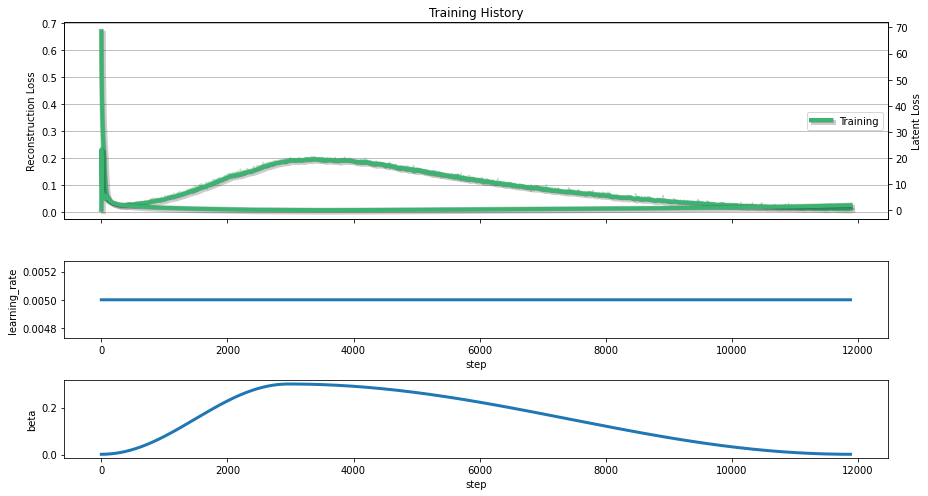

In [ ]:
adjusting_trainer.monitor.dataframe_monitor.plot(figsize=(13, 7), skip_first=0,
                               metrics=['reconstruction_loss', 'latent_loss'],
                               hyperparameters=[{'name': 'learning_rate'},
                                                {'name': 'beta'}]
                              );

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


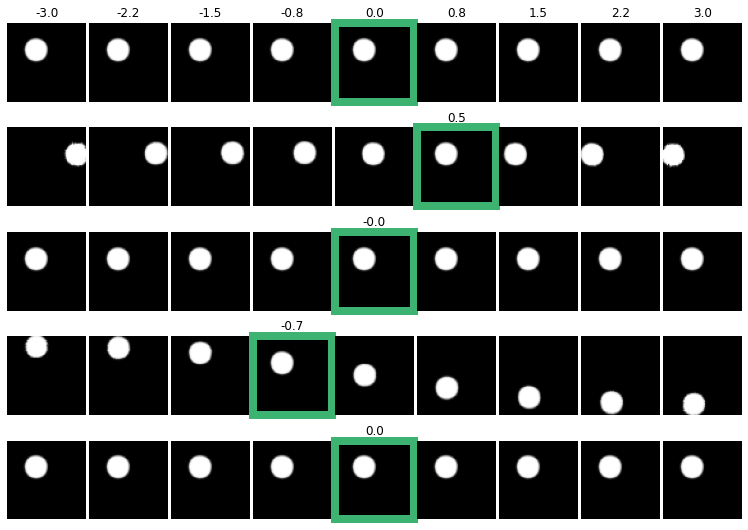

In [ ]:
plot_traversal(adjusting_trainer, index=950)

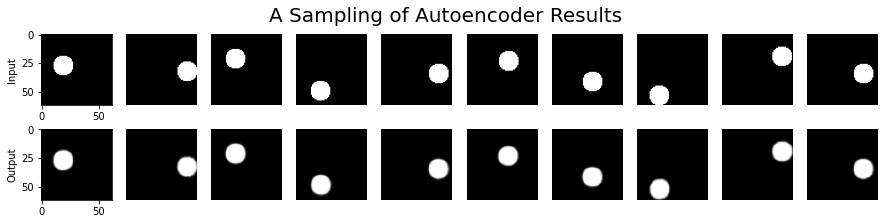

In [ ]:
adjusting_trainer.plot_input_output_pairs();

## **dSprites Dataset**

dSprites is a dataset of 2D shapes procedurally generated from 6 ground truth independent latent factors. These factors are color, shape, scale, rotation, x and y positions of a sprite.

All possible combinations of these latents are present exactly once, generating N = 737280 total images.

1. Color: white
2. Shape: square, ellipse, heart
3. Scale: 6 values linearly spaced in [0.5, 1]
4. Orientation: 40 values in [0, 2 pi]
5. Position X: 32 values in [0, 1]
6. Position Y: 32 values in [0, 1]

## **Disentanglement Usefulness**

* A model trained on a dataset of 3D objects might learn independent latent units sensitive to single independent data generative factors, such as object identity, position, scale, lighting or colour, thus acting as an inverse graphics model (Kulkarni et al., 2015).
* Scenarios which require knowledge transfer, where faster learning is achieved by reusing learnt representations for numerous tasks.
* Zero-shot inference, where reasoning about new data is enabled by recombining previously learnt factors.

## **Theory**

Follows the variational autoencoder (VAE) framework with an adjustable hyperparameter β (β = 1 corresponds to regular VAE). This hyperparameter imposes a limit on the capacity of the latent information channel and an emphasis on learning statistically independent latent factors. This, when combined with the data log likelihood maximisation objective of generative models, leads to the model acquiring the most efficient latent representation of the data, which is disentangled if the data is produced using at least some ground truth factors of variation that are independent.



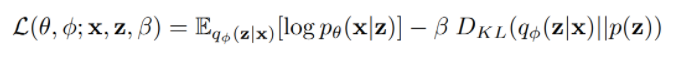

The above equation forms the ELBO objective function that needs to be maximized. While the first term accounts for reconstruction fidelity, the second term is a measure of the KL distance of learnt posterior and Gaussian prior p(z) (puts implicit independence pressure due to the isotropic nature of Gaussian prior). Higher values of β should encourage learning a more disentangled representation. The extra pressures coming from high β values, however, may create a trade-off between reconstruction fidelity and the quality of disentanglement within the learnt latent representations.

The latest paper suggests new intuitions and theoretical assessments of the emergence of disentangled representation in variational autoencoders. It proposes a modification to the training regime of β-VAE, that progressively increases the information capacity of the latent code during training. This modification facilitates the robust learning of disentangled representations in β-VAE, without the previous trade-off in reconstruction accuracy. The new objective function is as follows:

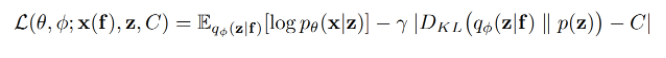

where C is the latent encoding capacity that is linearly increased over 100,000 training steps from 0 to 25 nats. This step enables progressively more factors of variation to be represented whilst retaining disentangling in previously learned factors.  is chosen as 1000, which is large enough to ensure the actual KL remains close to the target KL (C).

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import pandas as pd

from google.colab import drive
import numpy as np
import seaborn as sns
import math
import tensorflow as tf
import random

import os
import datetime as dt

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

In [4]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
dataset_zip = np.load('drive/My Drive/Colab Notebooks/CSYE_7370_Final_Project/Dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding = 'latin1')

* imgs : (737280 x 64 x 64, uint8) Images in black and white.
* latents_values : (737280 x 6, float64) Values of the latent factors.
* latents_classes : (737280 x 6, int64) Integer index of the latent factor values. Useful as classification targets.
* metadata : some additional information, including the possible latent values.

In [6]:
print('Keys in the dataset:', dataset_zip.keys())
imgs = dataset_zip['imgs']                             # imgs: (737280 x 64 x 64, uint8) Images in black and white.
latents_values = dataset_zip['latents_values']         # latents_values : (737280 x 6, float64) Values of the latent factors.
latents_classes = dataset_zip['latents_classes']       # latents_classes: (737280 x 6, int64) Integer index of the latent factor values. Useful as classification targets.
metadata = dataset_zip['metadata'][()]                 # metadata: some additional information, including the possible latent values.

#print('Metadata: \n', metadata)

Keys in the dataset: KeysView(<numpy.lib.npyio.NpzFile object at 0x7f26f5e76a90>)


In [7]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes'] # latents_sizes = [ 1  3  6 40 32 32]
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:], np.array([1,]))) # latents_bases = [737280 245760  40960   1024     32      1]
n_samples = latents_bases[0]

def latent_to_index(latents):
    return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
    samples = np.zeros((size, latents_sizes.size))
    for lat_i, lat_size in enumerate(latents_sizes):
        samples[:, lat_i] = np.random.randint(lat_size, size=size)

    return samples

In [8]:
# image getter methods
def sample_image(shape = 0, scale = 0, orientation = 0, x = 0, y = 0):
    latents = [0, shape, scale, orientation, x, y]
    index = np.dot(latents, self.latents_bases).astype(int)
    return get_images([index])[0]

def sample_images(indices):
    images = []
    for index in indices:
        img = imgs[index]
        img = img.reshape(4096)
        images.append(img)
    return images

def sample_random_images(size):
    indices = [np.random.randint(n_samples) for i in range(size)]
    return sample_images(indices)

In [9]:
epochs = 10000
batch_size = 64
beta = 1000
capacity_limit = 25.0
capacity_change_duration = 100000
learning_rate = 5e-4
checkpoint_dir = "conv_beta_checkpoints"
log_file = "conv_log_files"

## **Model Architecture**

* The encoder for the VAEs consists of 4 convolutional layers, each with 32 channels, 4x4 kernels, and a stride of 2. This is followed by 2 fully connected layers, each of 256 units. The latent distribution consists of one fully connected layer of 20 units parametrising the mean and log standard deviation of 10 Gaussian random variables. The decoder architecture is simply the transpose of the encoder, but with the output parametrising Bernoulli distributions over the pixels.
* ReLU activations are used throughout.
* Adam optimiser with a learning rate of 5e-4 is used to train the network.

## **Architecture Build**

* conv_beta_vae : The encoder for the VAEs consists of 4 convolutional layers, each with 32 channels, 4x4 kernels, and a stride of 2. This is followed by 2 fully connected layers, each of 256 units. The latent distribution consists of one fully connected layer of 20 units parametrising the mean and log standard deviation of 10 Gaussian random variables. The decoder architecture is simply the transpose of the encoder, but with the output parametrising Bernoulli distributions over the pixels.
* beta_vae : Input(4096, flattened)->FC(1200)->FC(1200)->FC(10)->FC(1200)->FC(1200)->FC(1200)->FC(4096)
* ReLU activations are used throughout.
Adam optimiser with a learning rate of 5e-4 is used to train the network.

In [10]:
# model architecture
inputs_ = tf.layers.Flatten()(tf.placeholder(tf.float32, (None, 64,64,1), name="input")) # Input placeholder
capacity = tf.placeholder(tf.float32, shape=[]) # Encoding capcity

with tf.variable_scope("Encoder"):
    fc1 = tf.layers.dense(inputs_, 1200, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    fc2 = tf.layers.dense(fc1, 1200, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    fc3 = tf.layers.dense(fc2, 20, kernel_initializer=tf.contrib.layers.xavier_initializer())
    mean = fc3[:,:10]
    log_std_dev = tf.clip_by_value(fc3[:,10:],1e-8,5)

eps = tf.random_normal( tf.shape(mean), 0, 1, dtype=tf.float32 )
z = tf.add(mean, tf.multiply(tf.sqrt(tf.exp(log_std_dev)), eps)) # z = mu + sigma * epsilon

with tf.variable_scope("Decoder"):
    fc4 = tf.layers.dense(z, 1200, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    fc5 = tf.layers.dense(fc4, 1200, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    fc6 = tf.layers.dense(fc5, 1200, activation = tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer())
    reconstruct_logit = tf.layers.dense(fc6, 4096, kernel_initializer=tf.contrib.layers.xavier_initializer())
    reconstruct = tf.nn.sigmoid(reconstruct_logit)
with tf.variable_scope("Loss"):
    reconstr_loss = tf.reduce_mean(tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels = inputs_, logits = reconstruct_logit),1)) # Reconstruction loss
    latent_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + 2*log_std_dev - tf.square(mean) - tf.square(tf.exp(log_std_dev)),1)) # Latent loss
    loss = reconstr_loss + beta * tf.abs(latent_loss - capacity)
    
    reconstr_loss_summary_op = tf.summary.scalar('reconstr_loss', reconstr_loss)
    latent_loss_summary_op   = tf.summary.scalar('latent_loss',   latent_loss)
    summary_op = tf.summary.merge([reconstr_loss_summary_op, latent_loss_summary_op])
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# helping functions
def _calc_encoding_capacity(step):
    if step > capacity_change_duration:
        c = capacity_limit
    else:
        c = capacity_limit * (step / capacity_change_duration)
    return c

def batch_train(sess, xs, step):
    c = _calc_encoding_capacity(step)
    _, reconstruction_loss, latent_z_loss, summary_str = sess.run((optimizer, reconstr_loss, latent_loss, summary_op), feed_dict={inputs_ : xs, capacity : c})
    return reconstruction_loss, latent_z_loss, summary_str
  
def input_to_output(sess, xs):
    # Original VAE output
    return sess.run(reconstruct, feed_dict={inputs_: xs})

def input_to_latent(sess, xs):
    return sess.run([mean, log_std_dev], feed_dict={inputs_: xs})

def latent_to_output(sess, zs):
    """ Generate data by sampling from latent space. """
    return sess.run(reconstruct, feed_dict={z: zs})
saver = tf.train.Saver()

In [12]:
total_batch = n_samples // batch_size
print(total_batch)

11520


In the training below, we manually stop the training at over 40 epochs

In [18]:
# training step
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    summary_writer = tf.summary.FileWriter(log_file, sess.graph)
    reconstruct_check_images = sample_random_images(10)
    indices = list(range(n_samples))
    step = 0
    n1=dt.datetime.now()
    for epoch in range(epochs):
        random.shuffle(indices)
        r_loss_term = 0
        l_loss_term = 0
        for i in range(total_batch):
            batch_indices = indices[batch_size*i : batch_size*(i+1)]
            batch_xs = sample_images(batch_indices)

            # Fit training using batch data
            reconstruction_loss, latent_z_loss, summary_str = batch_train(sess, batch_xs, step)
            summary_writer.add_summary(summary_str, step)
            if step%1000 == 0:
                n2=dt.datetime.now()
                print("step count: "+str(step)+" time: "+str((n2-n1).seconds)+"sec reconstruction loss: "+str(reconstruction_loss)+" latent loss: "+str(latent_z_loss)+" capacity: "+str(_calc_encoding_capacity(step)))
                n1 = n2
            step += 1
            r_loss_term += reconstruction_loss
            l_loss_term += latent_z_loss
        
        print("------------------------------epoch: "+str(epoch)+" reconstruction loss: "+str(r_loss_term/total_batch)+" latent loss: "+str(l_loss_term/total_batch)+"------------------------------")
        # Save checkpoint
        save_path = saver.save(sess, checkpoint_dir + '/' + 'checkpoint', global_step = epoch)

step count: 0 time: 0sec reconstruction loss: 2839.3047 latent loss: 0.6005075 capacity: 0.0
step count: 1000 time: 5sec reconstruction loss: 527.67584 latent loss: 0.245237 capacity: 0.25
step count: 2000 time: 5sec reconstruction loss: 488.75812 latent loss: 0.4238394 capacity: 0.5
step count: 3000 time: 5sec reconstruction loss: 469.34988 latent loss: 0.7731057 capacity: 0.75
step count: 4000 time: 6sec reconstruction loss: 462.9907 latent loss: 1.0269147 capacity: 1.0
step count: 5000 time: 5sec reconstruction loss: 458.4898 latent loss: 1.3425312 capacity: 1.25
step count: 6000 time: 5sec reconstruction loss: 423.2581 latent loss: 1.5689754 capacity: 1.5
step count: 7000 time: 5sec reconstruction loss: 420.74066 latent loss: 1.4365711 capacity: 1.7500000000000002
step count: 8000 time: 5sec reconstruction loss: 417.41522 latent loss: 1.9190598 capacity: 2.0
step count: 9000 time: 5sec reconstruction loss: 416.05112 latent loss: 2.1655805 capacity: 2.25
step count: 10000 time: 5sec

KeyboardInterrupt: ignored

In [19]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

INFO:tensorflow:Restoring parameters from conv_beta_checkpoints/checkpoint-40


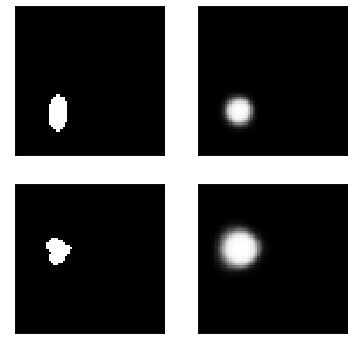

In [20]:
# VAE reconstruction check
with tf.Session() as sess:
    saver.restore(sess, checkpoint_dir + '/' + 'checkpoint-40')
    #sess.run(tf.global_variables_initializer())
    rand_imgs = sample_random_images(2)
    rand_reconst_imgs = input_to_output(sess, rand_imgs).reshape(-1,64,64)
    side_by_side = np.array(rand_imgs).reshape(-1,64,64)
    show_images_grid([side_by_side[0],rand_reconst_imgs[0],side_by_side[1],rand_reconst_imgs[1]], 4)

INFO:tensorflow:Restoring parameters from conv_beta_checkpoints/checkpoint-40
Variance: 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

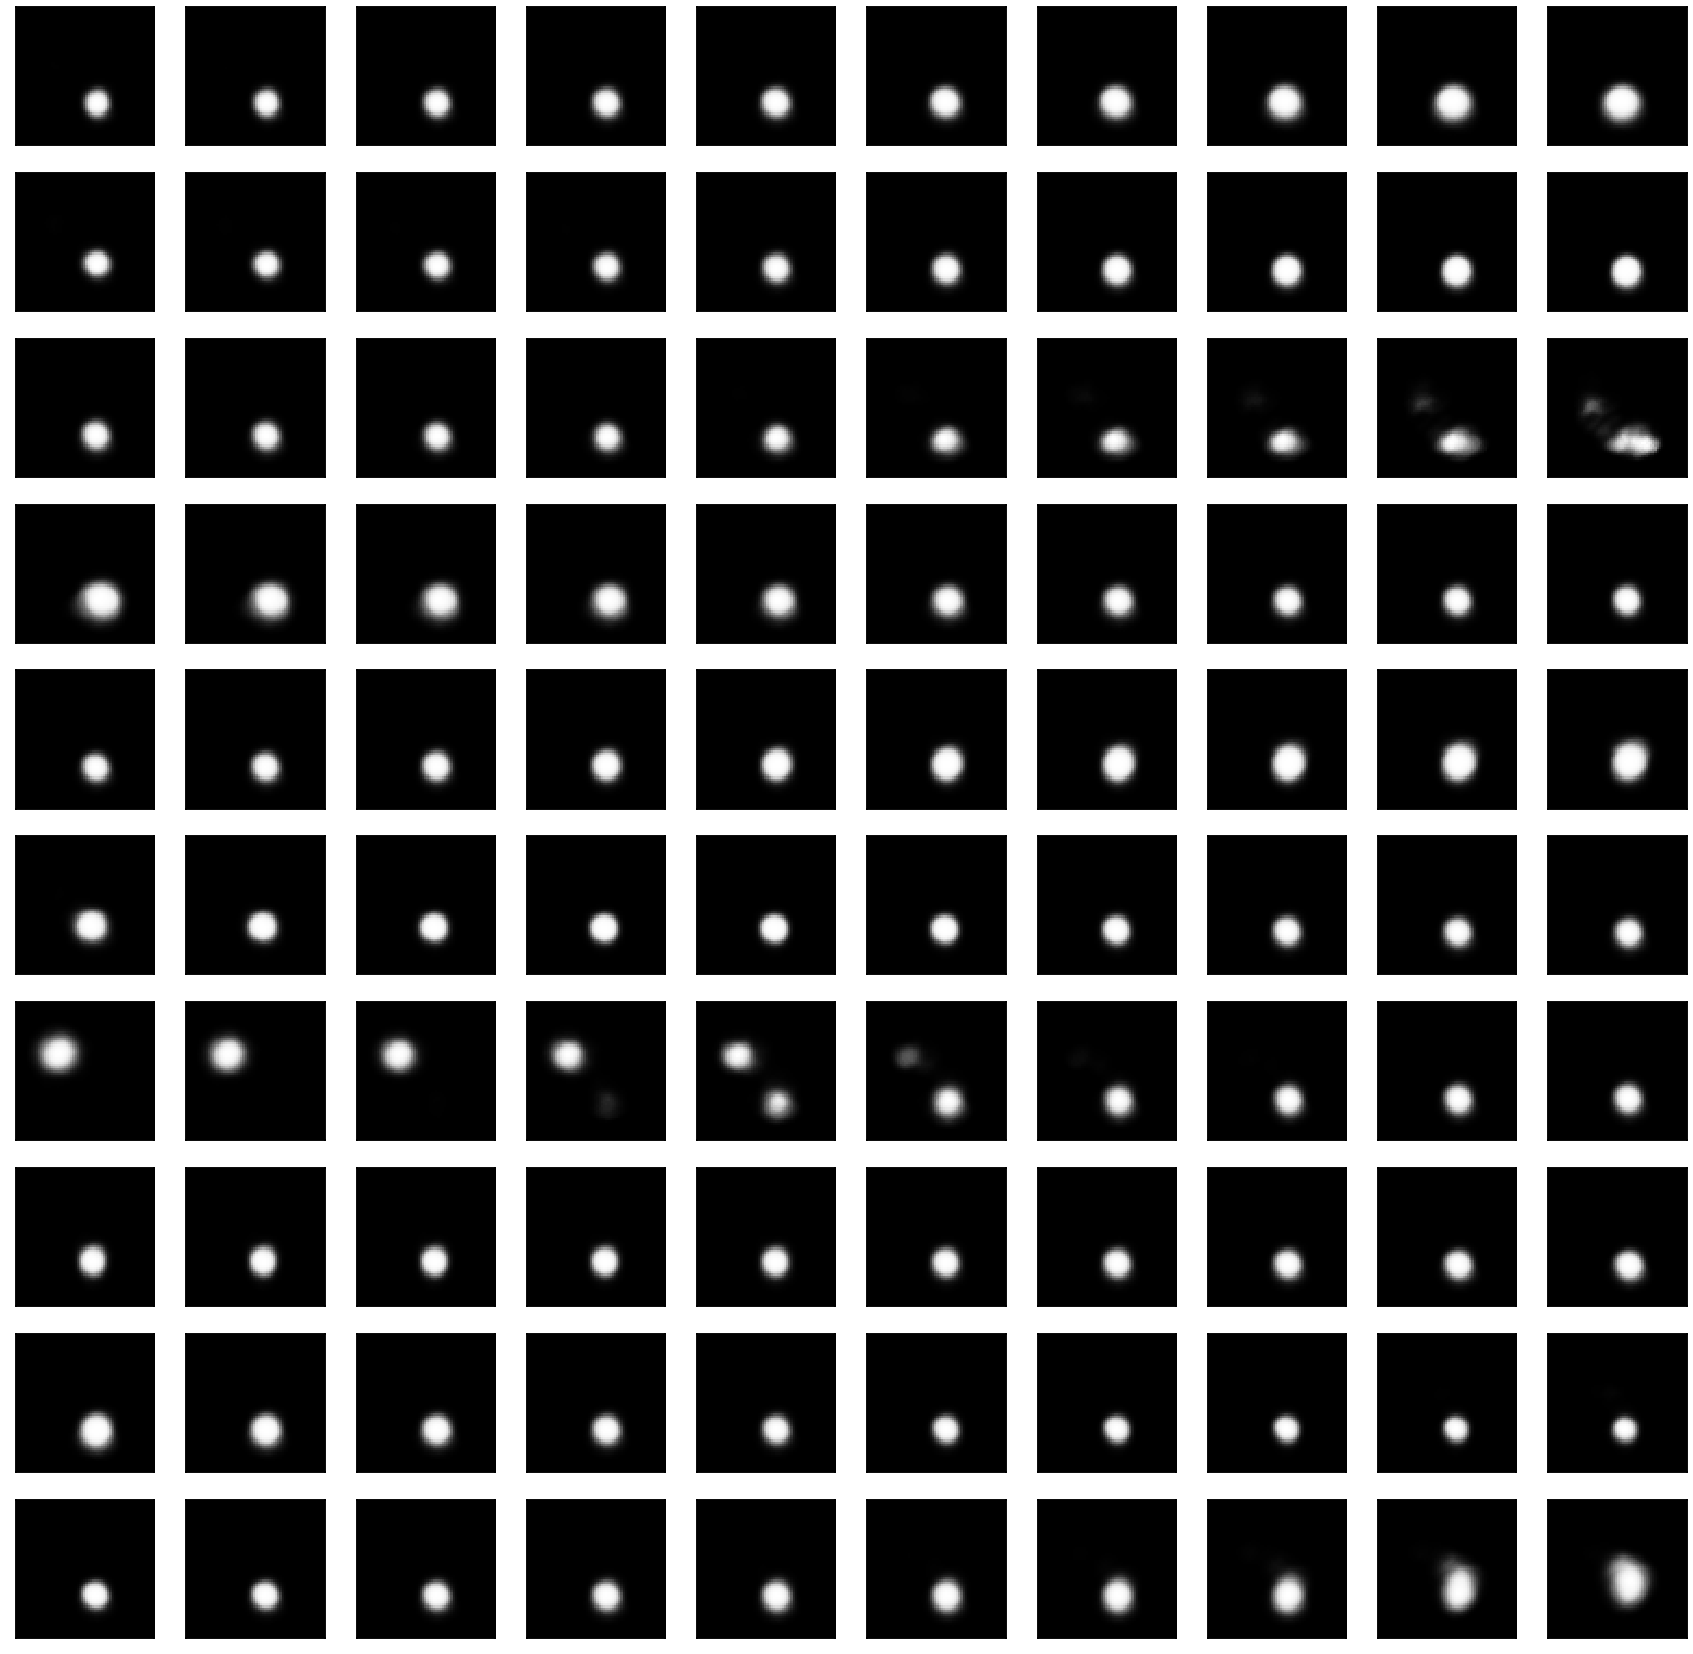

In [21]:
# Disentanglement check: sweep over the latent space
with tf.Session() as sess:
    saver.restore(sess, checkpoint_dir + '/' + 'checkpoint-40')
    rand_imgs = sample_random_images(1)
    latent_mean, latent_log_std = input_to_latent(sess, rand_imgs)
    z_sigma_sq = np.exp(latent_log_std)[0]
    z_mean = latent_mean[0]
    print("Variance: ", end="")
    for x in z_sigma_sq:
        print(x, end=', ')
    
    appended_list = []
    for target_z_index in range(10):
        for ri in range(10):
            value = -3.0 + (6.0 / 9.0) * ri
            z_mean2 = np.zeros((1, 10))
            for i in range(10):
                if( i == target_z_index ):
                    z_mean2[0][i] = value
                else:
                    z_mean2[0][i] = z_mean[i]
            reconstr_img = latent_to_output(sess, z_mean2)
            rimg = reconstr_img[0].reshape(64, 64)
            appended_list.append(rimg)
      #imsave("disentangle_img/check_z{0}_{1}.png".format(target_z_index,ri), rimg)
    
    show_images_grid(appended_list, 100)

## **Results**

Result by changing latent Z from -3.0 to 3.0 with γ=100.0 and C=20.0

Latent variables with small variances seem extracting "x", "y", "rotation" and "scale" parameters.

## **Conclusion**

We have gained insights into why β-VAE learns a disentangled representation
of the generative factors of visual data compared to the standard VAE objective.  We proposed controlling the increase of the
encoding capacity of the latent posterior during training, by allowing the average KL divergence with
the prior to gradually increase from zero, rather than the fixed β-weighted KL term in the original βVAE objective. We show that this promotes robust learning of disentangled representation combined
with better reconstruction fidelity, compared to the results achieved in the original formulation of

### **Next Steps**

Implement B-VAE and Evaluate Disentanglement on other datasets like TMNIST, celebA, Cars3D to see how it affects latent space.

## **References**

1. **Prof. Nik Brown - Unspervised Learning of Disentangled Representations** - https://docs.google.com/presentation/d/1GKcpYGH8vphwr25Y7N-qyIcFhyoDafc8XcMKeygX_7k/edit#slide=id.p
2.  **dSprites Data and Code** - https://github.com/Akella17/Beta-VAE/blob/master/beta_vae.ipynb
3. **SimpleDots** - https://github.com/davidlmorton/disentangled/blob/master/beta_variational_autoencoder_simple_dots.ipynb
4. **Understanding disentangling in B-VAE** - https://arxiv.org/abs/1804.03599
5. **B-VAE:** Learning Basic Visual Concepts with a Constrained Variational Framework - https://openreview.net/forum?id=Sy2fzU9gl



## **LICENSE**

Copyright <2021> Keshav K L

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.